In [1]:
from xcube.core.store import new_data_store

In [2]:
store = new_data_store(
    "sentinelhub",
    client_id='sh-d8276890-2886-489e-9539-f0ecb9360cba',
    client_secret='8yZ439YD4zfcwkyE8zMcPgYzV45FRZB8',
    instance_url='https://sh.dataspace.copernicus.eu',
    oauth2_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect',
)

In [3]:
store.list_data_ids()

['S2L1C', 'S3OLCI', 'S3SLSTR', 'S1GRD', 'S2L2A', 'S5PL2']

In [4]:
dataset = store.open_data(
    'S2L2A', 
    variable_names=['B04'], 
    bbox=[9.7, 53.4, 10.2, 53.7],
    spatial_res=0.00018, 
    time_range=('2023-08-10','2023-08-20'), 
    time_period='1D',
    tile_size=[1024, 1024]
)
dataset

<xarray.Dataset>
Dimensions:    (time: 11, lat: 2048, lon: 3072, bnds: 2)
Coordinates:
  * lat        (lat) float64 53.77 53.77 53.77 53.77 ... 53.4 53.4 53.4 53.4
  * lon        (lon) float64 9.7 9.7 9.7 9.701 9.701 ... 10.25 10.25 10.25 10.25
  * time       (time) datetime64[ns] 2023-08-10T12:00:00 ... 2023-08-20T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(11, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    title:                     S2L2A Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-03-13T14:44:30.956487
    time_coverage_start:       2023-08-10T00:00:00+00:00
    time_coverage_end:         2023-08-21T00:00:00+00:00
    ...                        ...
    time_coverage_resolution:  P1DT0H0M0S
    geospatial_lon_min:        9.7
    geospatial_lat_min:        53.4
    geospatial_lon_max:        10.25296
    geospatial_lat_max:        53.76864
    processing_level:          L2A

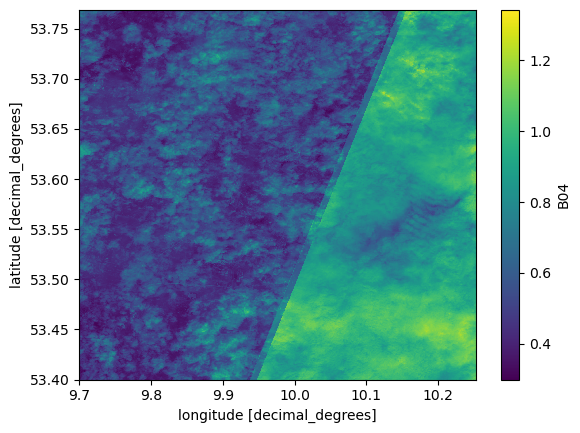

In [5]:
dataset.B04.mean("time").plot.imshow()